<a href="https://colab.research.google.com/github/wadhwaniv1/ML-Learning-repo/blob/master/Image%20Classification%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
X_test[0].shape

(32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

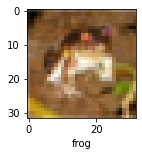

In [15]:
plot_sample(X_train, y_train, 0)

In [16]:
#Scaling
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
#ANN
ann = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

#Very low accuracy

Epoch 1/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.9332 - accuracy: 0.3038
Epoch 2/5
 155/1563 [=>............................] - ETA: 55s - loss: 1.6469 - accuracy: 0.4139

KeyboardInterrupt: ignored

In [25]:
#CNN
cnn = keras.Sequential([
                        
                        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                        keras.layers.MaxPooling2D((2, 2)),
                        
                        keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
                        keras.layers.MaxPooling2D((2, 2)),
                        
                        keras.layers.Flatten(),
                        keras.layers.Dense(64, activation='relu'),
                        keras.layers.Dense(10, activation='softmax')    
    ])

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.6998 - accuracy: 0.3775
Epoch 2/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1646 - accuracy: 0.5934
Epoch 3/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9947 - accuracy: 0.6536
Epoch 4/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9081 - accuracy: 0.6823
Epoch 5/5
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8410 - accuracy: 0.7054


In [28]:
#With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9481 - accuracy: 0.6726


[0.9481052756309509, 0.6725999712944031]

In [29]:
y_test = y_test.reshape(-1,)

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

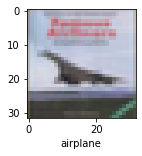

In [31]:
plot_sample(X_test, y_test,3)

In [32]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.23645561e-03, 4.64990764e-04, 8.28938466e-03, 7.32886851e-01,
        5.80579217e-04, 1.83601096e-01, 7.64621305e-04, 6.96875795e-04,
        6.68072104e-02, 2.67195981e-03],
       [1.14488397e-02, 1.79044902e-02, 2.93816502e-05, 5.44672321e-06,
        4.70478153e-06, 2.65835240e-07, 3.09288484e-09, 1.76706317e-06,
        9.69780922e-01, 8.24185554e-04],
       [1.52476937e-01, 1.59771726e-01, 4.29020543e-03, 3.94753646e-03,
        1.74216903e-03, 9.62654536e-04, 2.96973521e-05, 4.10352228e-03,
        5.73390365e-01, 9.92851406e-02],
       [8.72995436e-01, 4.40044552e-02, 1.01309605e-02, 2.22178898e-03,
        2.37970408e-02, 1.14420211e-04, 5.13755949e-05, 7.11630157e-04,
        4.53926623e-02, 5.80195803e-04],
       [3.73564908e-05, 8.05491654e-05, 3.25898826e-02, 3.05742491e-02,
        6.85330689e-01, 1.44353714e-02, 2.36459151e-01, 1.69660590e-04,
        2.93560151e-04, 2.95786249e-05]], dtype=float32)

In [33]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [34]:
classes[y_classes[3]]

'airplane'

In [35]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.76      0.84      0.80      1000
           2       0.51      0.64      0.57      1000
           3       0.54      0.49      0.51      1000
           4       0.63      0.57      0.60      1000
           5       0.65      0.53      0.58      1000
           6       0.86      0.62      0.73      1000
           7       0.61      0.82      0.70      1000
           8       0.72      0.82      0.77      1000
           9       0.82      0.68      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

